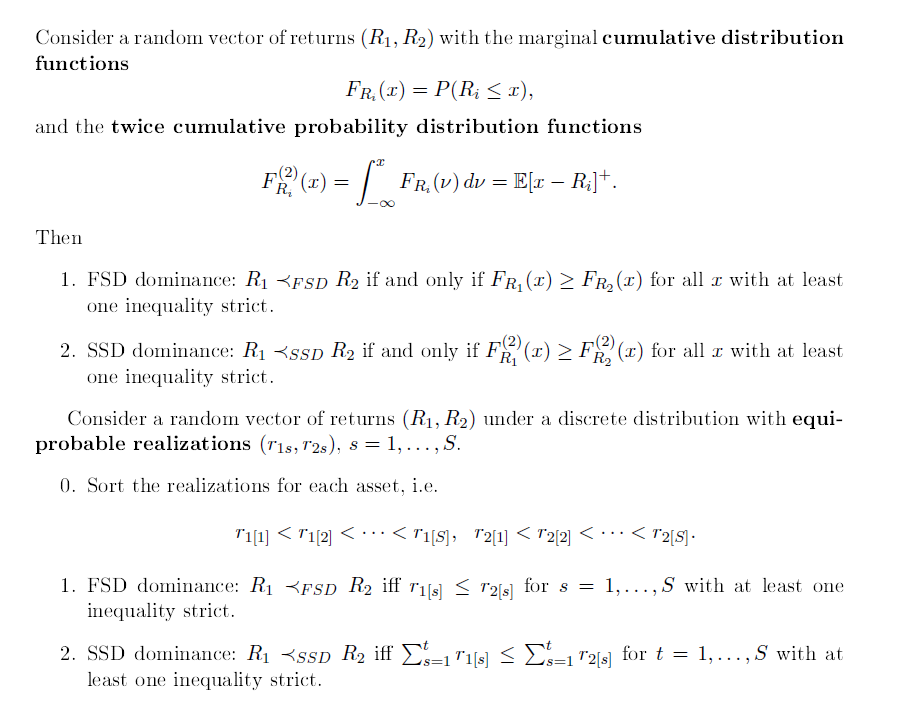

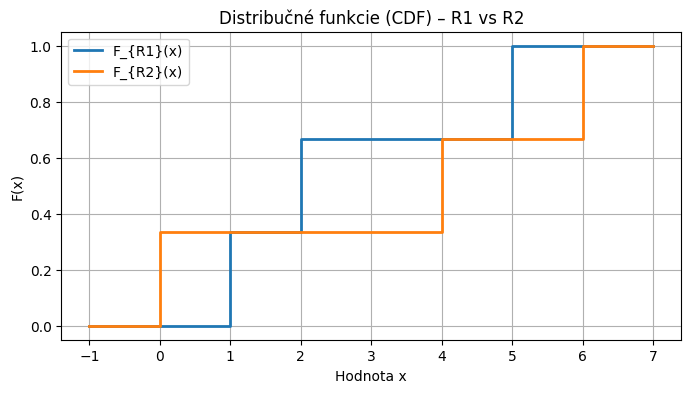

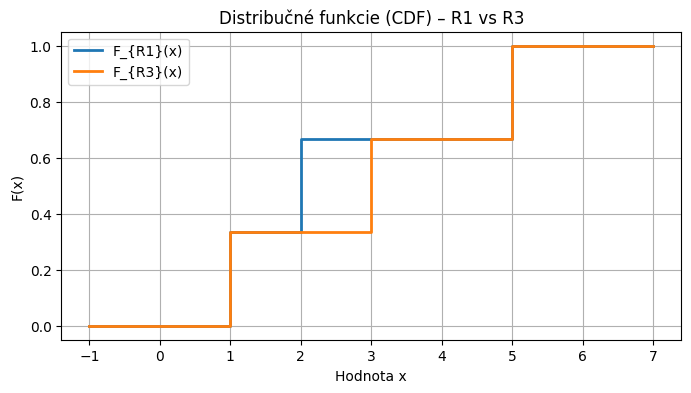

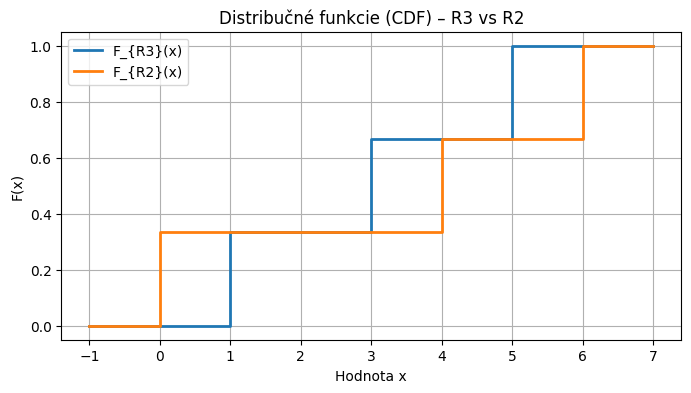

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Výnosy a pravdepodobnosti pre R1, R2, R3
r1_vynosy = [2, 1, 5]
r1_pravd = [1/3, 1/3, 1/3]

r2_vynosy = [0, 6, 4]
r2_pravd = [1/3, 1/3, 1/3]

r3_vynosy = [1, 3, 5]
r3_pravd = [1/3, 1/3, 1/3]

# Hodnoty osí x (pre ktoré počítame CDF)
vsetky_vynosy = np.array(r1_vynosy + r2_vynosy + r3_vynosy)
hodnoty_x = np.arange(vsetky_vynosy.min() - 1, vsetky_vynosy.max() + 2)


# Funkcia na výpočet  distribučnej funkcie (CDF)
def vypocitaj_cdf(x_hodnoty, vynosy, pravdepodobnosti):
    cdf = []
    for x in x_hodnoty:
        cdf_hodnota = sum(p for v, p in zip(vynosy, pravdepodobnosti) if v <= x)
        cdf.append(cdf_hodnota)
    return cdf

# Výpočet CDF pre všetky aktíva
cdf_r1 = vypocitaj_cdf(hodnoty_x, r1_vynosy, r1_pravd)
cdf_r2 = vypocitaj_cdf(hodnoty_x, r2_vynosy, r2_pravd)
cdf_r3 = vypocitaj_cdf(hodnoty_x, r3_vynosy, r3_pravd)

# Graf: R1 vs R2
plt.figure(figsize=(8, 4))
plt.step(hodnoty_x, cdf_r1, where='post', label='F_{R1}(x)', linewidth=2)
plt.step(hodnoty_x, cdf_r2, where='post', label='F_{R2}(x)', linewidth=2)
plt.title("Distribučné funkcie (CDF) – R1 vs R2")
plt.xlabel("Hodnota x")
plt.ylabel("F(x)")
plt.grid(True)
plt.legend()
plt.ylim(-0.05, 1.05)
plt.show()

# Graf: R1 vs R3
plt.figure(figsize=(8, 4))
plt.step(hodnoty_x, cdf_r1, where='post', label='F_{R1}(x)', linewidth=2)
plt.step(hodnoty_x, cdf_r3, where='post', label='F_{R3}(x)', linewidth=2)
plt.title("Distribučné funkcie (CDF) – R1 vs R3")
plt.xlabel("Hodnota x")
plt.ylabel("F(x)")
plt.grid(True)
plt.legend()
plt.ylim(-0.05, 1.05)
plt.show()

# Graf: R3 vs R2
plt.figure(figsize=(8, 4))
plt.step(hodnoty_x, cdf_r3, where='post', label='F_{R3}(x)', linewidth=2)
plt.step(hodnoty_x, cdf_r2, where='post', label='F_{R2}(x)', linewidth=2)
plt.title("Distribučné funkcie (CDF) – R3 vs R2")
plt.xlabel("Hodnota x")
plt.ylabel("F(x)")
plt.grid(True)
plt.legend()
plt.ylim(-0.05, 1.05)
plt.show()


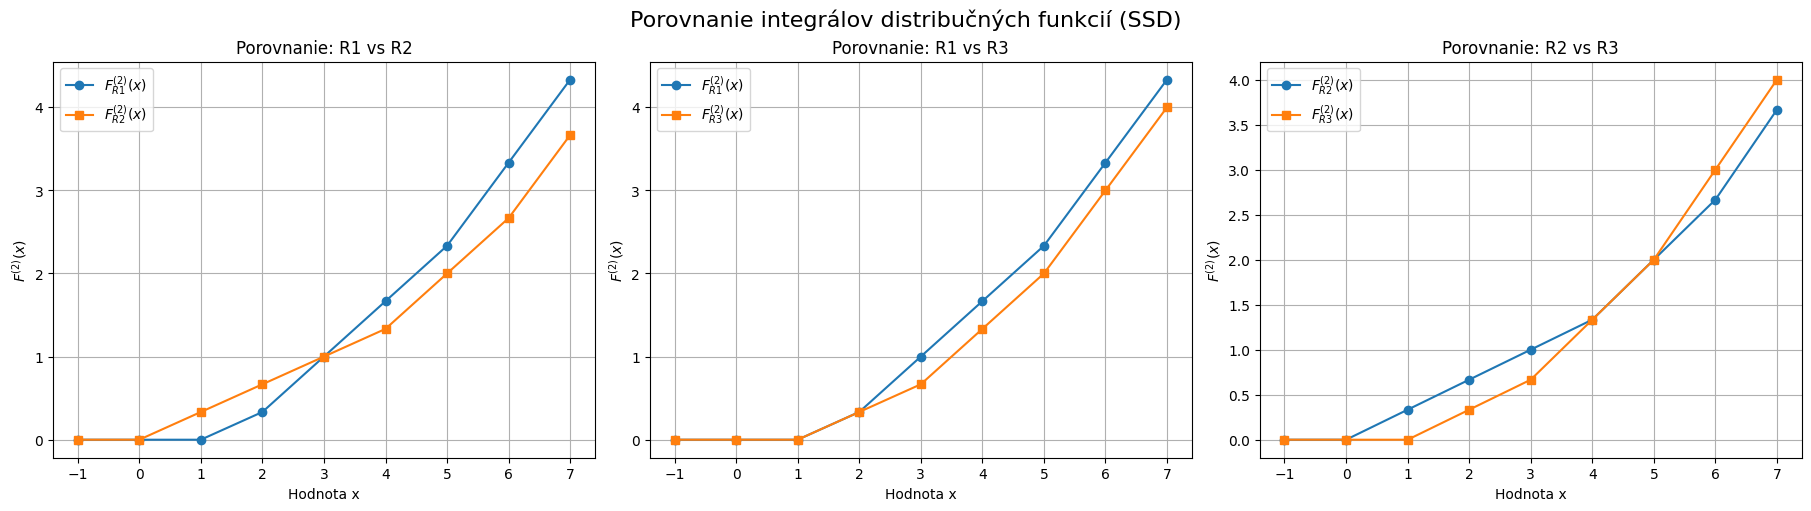

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Automatické určenie podpornej množiny x podľa výnosov
r1_vynosy = np.array([2, 1, 5])
r2_vynosy = np.array([0, 6, 4])
r3_vynosy = np.array([1, 3, 5])
vsetky_vynosy = np.concatenate([r1_vynosy, r2_vynosy, r3_vynosy])
x_hodnoty = np.arange(vsetky_vynosy.min() - 1, vsetky_vynosy.max() + 2)

# Pravdepodobnosti realizácií
r1_pravd = np.array([1/3, 1/3, 1/3])
r2_pravd = np.array([1/3, 1/3, 1/3])
r3_pravd = np.array([1/3, 1/3, 1/3])

# Funkcia na výpočet SSD distribučnej funkcie F^{(2)}(x)
def vypocitaj_ssd(x_hodnoty, vynosy, pravdepodobnosti):
    return [sum((x - v if x > v else 0) * p for v, p in zip(vynosy, pravdepodobnosti)) for x in x_hodnoty]

# Funkcia na vykreslenie porovnania medzi dvoma akciami
def vykresli_porovnanie(x_hodnoty, data1, pravd1, data2, pravd2, ozn1, ozn2, ax):
    f2_1 = vypocitaj_ssd(x_hodnoty, data1, pravd1)
    f2_2 = vypocitaj_ssd(x_hodnoty, data2, pravd2)

    ax.plot(x_hodnoty, f2_1, marker='o', label=f'$F^{{(2)}}_{{{ozn1}}}(x)$')
    ax.plot(x_hodnoty, f2_2, marker='s', label=f'$F^{{(2)}}_{{{ozn2}}}(x)$')
    ax.set_title(f"Porovnanie: {ozn1} vs {ozn2}")
    ax.set_xlabel("Hodnota x")
    ax.set_ylabel(r"$F^{(2)}(x)$")
    ax.grid(True)
    ax.legend()

# Príprava grafov pre všetky trojice porovnaní
fig, osy = plt.subplots(1, 3, figsize=(18, 5), constrained_layout=True)

# R1 vs R2
vykresli_porovnanie(x_hodnoty, r1_vynosy, r1_pravd, r2_vynosy, r2_pravd, 'R1', 'R2', osy[0])

# R1 vs R3
vykresli_porovnanie(x_hodnoty, r1_vynosy, r1_pravd, r3_vynosy, r3_pravd, 'R1', 'R3', osy[1])

# R2 vs R3
vykresli_porovnanie(x_hodnoty, r2_vynosy, r2_pravd, r3_vynosy, r3_pravd, 'R2', 'R3', osy[2])

plt.suptitle("Porovnanie integrálov distribučných funkcií (SSD)", fontsize=16)
plt.show()


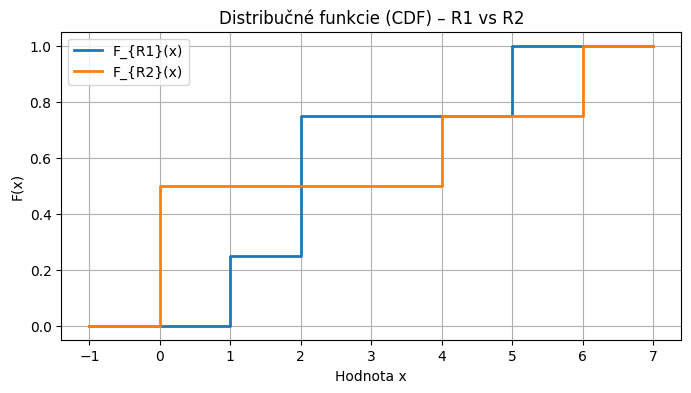

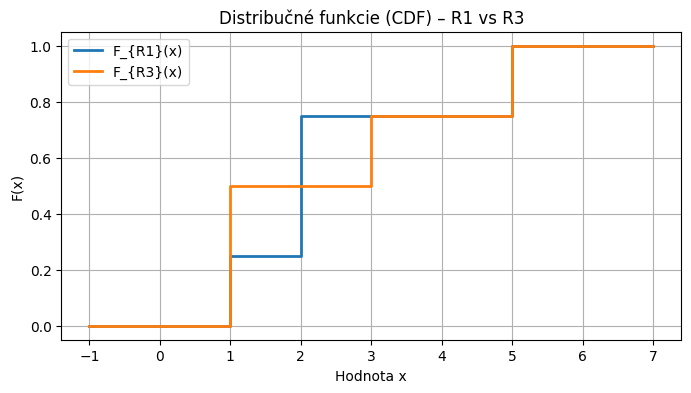

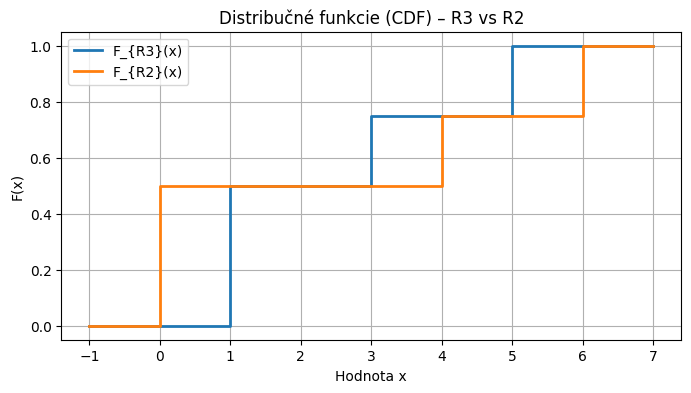

In [4]:
import matplotlib.pyplot as plt
import numpy as np


# Výnosy a pravdepodobnosti pre R1, R2, R3
r1_vynosy = [2, 1, 5]
r1_pravd = [0.5, 0.25, 0.25]

r2_vynosy = [0, 6, 4]
r2_pravd = [0.5, 0.25, 0.25]

r3_vynosy = [1, 3, 5]
r3_pravd = [0.5, 0.25, 0.25]

# Hodnoty osí x (pre ktoré počítame CDF)
vsetky_vynosy = np.array(r1_vynosy + r2_vynosy + r3_vynosy)
hodnoty_x = np.arange(vsetky_vynosy.min() - 1, vsetky_vynosy.max() + 2)
# Funkcia na výpočet  distribučnej funkcie (CDF)
def vypocitaj_cdf(x_hodnoty, vynosy, pravdepodobnosti):
    cdf = []
    for x in x_hodnoty:
        cdf_hodnota = sum(p for v, p in zip(vynosy, pravdepodobnosti) if v <= x)
        cdf.append(cdf_hodnota)
    return cdf

# Výpočet CDF pre všetky aktíva
cdf_r1 = vypocitaj_cdf(hodnoty_x, r1_vynosy, r1_pravd)
cdf_r2 = vypocitaj_cdf(hodnoty_x, r2_vynosy, r2_pravd)
cdf_r3 = vypocitaj_cdf(hodnoty_x, r3_vynosy, r3_pravd)

# Graf: R1 vs R2
plt.figure(figsize=(8, 4))
plt.step(hodnoty_x, cdf_r1, where='post', label='F_{R1}(x)', linewidth=2)
plt.step(hodnoty_x, cdf_r2, where='post', label='F_{R2}(x)', linewidth=2)
plt.title("Distribučné funkcie (CDF) – R1 vs R2")
plt.xlabel("Hodnota x")
plt.ylabel("F(x)")
plt.grid(True)
plt.legend()
plt.ylim(-0.05, 1.05)
plt.show()

# Graf: R1 vs R3
plt.figure(figsize=(8, 4))
plt.step(hodnoty_x, cdf_r1, where='post', label='F_{R1}(x)', linewidth=2)
plt.step(hodnoty_x, cdf_r3, where='post', label='F_{R3}(x)', linewidth=2)
plt.title("Distribučné funkcie (CDF) – R1 vs R3")
plt.xlabel("Hodnota x")
plt.ylabel("F(x)")
plt.grid(True)
plt.legend()
plt.ylim(-0.05, 1.05)
plt.show()

# Graf: R3 vs R2
plt.figure(figsize=(8, 4))
plt.step(hodnoty_x, cdf_r3, where='post', label='F_{R3}(x)', linewidth=2)
plt.step(hodnoty_x, cdf_r2, where='post', label='F_{R2}(x)', linewidth=2)
plt.title("Distribučné funkcie (CDF) – R3 vs R2")
plt.xlabel("Hodnota x")
plt.ylabel("F(x)")
plt.grid(True)
plt.legend()
plt.ylim(-0.05, 1.05)
plt.show()


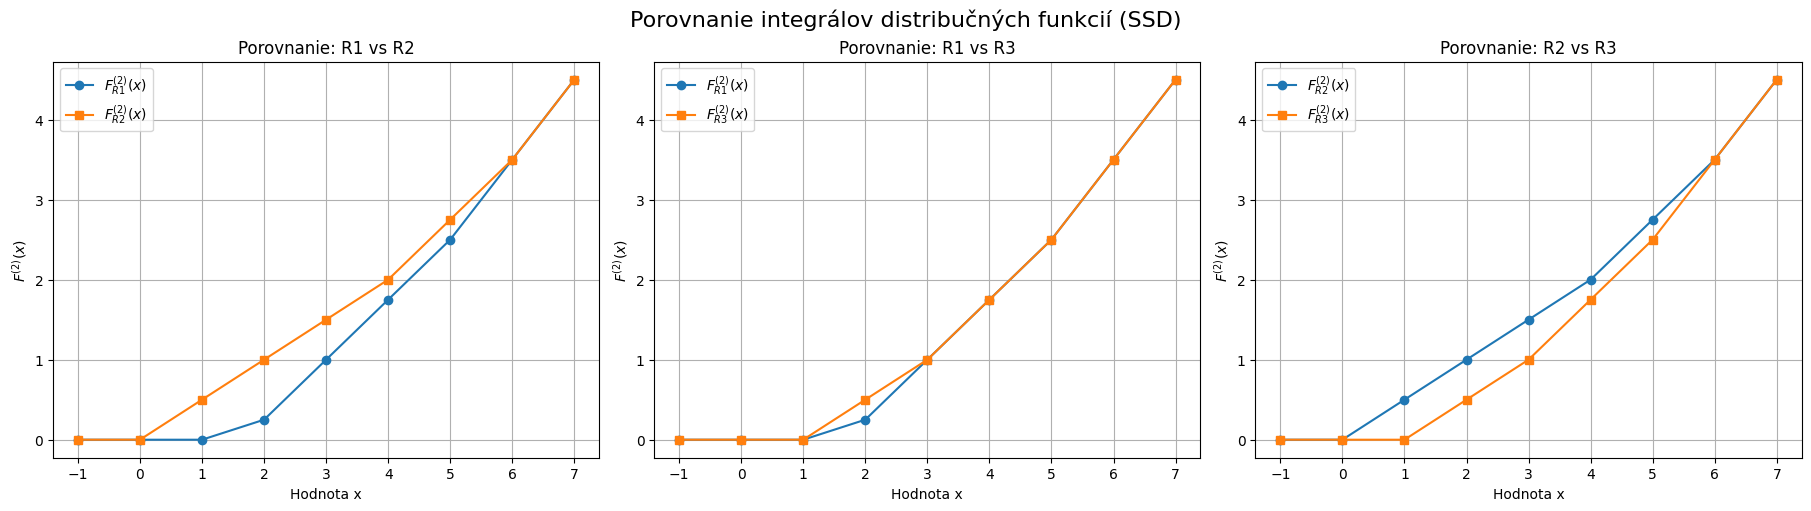

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Automatické určenie podpornej množiny x podľa výnosov
r1_vynosy = np.array([2, 1, 5])
r2_vynosy = np.array([0, 6, 4])
r3_vynosy = np.array([1, 3, 5])
vsetky_vynosy = np.concatenate([r1_vynosy, r2_vynosy, r3_vynosy])
x_hodnoty = np.arange(vsetky_vynosy.min() - 1, vsetky_vynosy.max() + 2)

# Pravdepodobnosti realizácií
r1_pravd = np.array([0.5, 0.25, 0.25])
r2_pravd = np.array([0.5, 0.25, 0.25])
r3_pravd = np.array([0.5, 0.25, 0.25])

# Funkcia na výpočet SSD distribučnej funkcie F^{(2)}(x)
def vypocitaj_ssd(x_hodnoty, vynosy, pravdepodobnosti):
    return [sum((x - v if x > v else 0) * p for v, p in zip(vynosy, pravdepodobnosti)) for x in x_hodnoty]

# Funkcia na vykreslenie porovnania medzi dvoma akciami
def vykresli_porovnanie(x_hodnoty, data1, pravd1, data2, pravd2, ozn1, ozn2, ax):
    f2_1 = vypocitaj_ssd(x_hodnoty, data1, pravd1)
    f2_2 = vypocitaj_ssd(x_hodnoty, data2, pravd2)

    ax.plot(x_hodnoty, f2_1, marker='o', label=f'$F^{{(2)}}_{{{ozn1}}}(x)$')
    ax.plot(x_hodnoty, f2_2, marker='s', label=f'$F^{{(2)}}_{{{ozn2}}}(x)$')
    ax.set_title(f"Porovnanie: {ozn1} vs {ozn2}")
    ax.set_xlabel("Hodnota x")
    ax.set_ylabel(r"$F^{(2)}(x)$")
    ax.grid(True)
    ax.legend()

# Príprava grafov pre všetky trojice porovnaní
fig, osy = plt.subplots(1, 3, figsize=(18, 5), constrained_layout=True)

# R1 vs R2
vykresli_porovnanie(x_hodnoty, r1_vynosy, r1_pravd, r2_vynosy, r2_pravd, 'R1', 'R2', osy[0])

# R1 vs R3
vykresli_porovnanie(x_hodnoty, r1_vynosy, r1_pravd, r3_vynosy, r3_pravd, 'R1', 'R3', osy[1])

# R2 vs R3
vykresli_porovnanie(x_hodnoty, r2_vynosy, r2_pravd, r3_vynosy, r3_pravd, 'R2', 'R3', osy[2])

plt.suptitle("Porovnanie integrálov distribučných funkcií (SSD)", fontsize=16)
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from IPython.display import display

# Výnosy pre každé aktívum
r1_data = np.array([2, 1, 5])
r2_data = np.array([0, 6, 4])
r3_data = np.array([1, 3, 5])

# Pravdepodobnosti
r1_probs = np.array([0.25, 0.25, 0.5])  # pre R1
r2_probs = np.array([0.5, 0.25, 0.25])  # pre R2
r3_probs = np.array([0.25, 0.25, 0.5])  # pre R3

# Vytvorenie množiny hodnôt x (hodnoty, kde budeme vyhodnocovať)
vsetky_vynosy = np.concatenate([r1_data, r2_data, r3_data])
x_hodnoty = np.arange(vsetky_vynosy.min(), vsetky_vynosy.max() + 1)

# Výpočet distribučnej funkcie (CDF): P(R ≤ x)
def vypocitaj_cdf(x_hodnoty, data, pravd):
    return [sum(p for val, p in zip(data, pravd) if val <= x) for x in x_hodnoty]

# Výpočet F^{(2)}(x) = E[(x - R)^+]
def vypocitaj_f2(x_hodnoty, data, pravd):
    return [sum((x - val if x > val else 0) * p for val, p in zip(data, pravd)) for x in x_hodnoty]

# Funkcia na vytvorenie tabuľky
def vytvor_tabulku(x_hodnoty, data_dict, pravd_dict, funkcia, popisy):
    tabulka = {}
    for kluc in data_dict:
        tabulka[popisy[kluc]] = funkcia(x_hodnoty, data_dict[kluc], pravd_dict[kluc])
    return pd.DataFrame(tabulka, index=[f"{x}" for x in x_hodnoty]).T

# Označenia riadkov pre CDF a F² tabuľky
popisy_cdf = {
    'R1': "P(R₁ ≤ x)",
    'R2': "P(R₂ ≤ x)",
    'R3': "P(R₃ ≤ x)"
}
popisy_f2 = {
    'R1': "F²(R₁)(x)",
    'R2': "F²(R₂)(x)",
    'R3': "F²(R₃)(x)"
}

# Vytvorenie tabuliek
cdf_tabulka = vytvor_tabulku(x_hodnoty,
                             {'R1': r1_data, 'R2': r2_data, 'R3': r3_data},
                             {'R1': r1_probs, 'R2': r2_probs, 'R3': r3_probs},
                             vypocitaj_cdf, popisy_cdf)

f2_tabulka = vytvor_tabulku(x_hodnoty,
                            {'R1': r1_data, 'R2': r2_data, 'R3': r3_data},
                            {'R1': r1_probs, 'R2': r2_probs, 'R3': r3_probs},
                            vypocitaj_f2, popisy_f2)

# Zobrazenie tabuliek
print("CDF tabuľka:")
display(cdf_tabulka.round(3))

print("\nTabuľka F² – druhá kumulatívna distribučná funkcia:")
display(f2_tabulka.round(3))

CDF tabuľka:


,0,1,2,3,4,5,6
P(R₁ ≤ x),0.0,0.25,0.50,0.5,0.50,1.00,1.0
P(R₂ ≤ x),0.5,0.50,0.50,0.5,0.75,0.75,1.0
P(R₃ ≤ x),0.0,0.25,0.25,0.5,0.50,1.00,1.0



Tabuľka F² – druhá kumulatívna distribučná funkcia:


,0,1,2,3,4,5,6
F²(R₁)(x),0.0,0.0,0.25,0.75,1.25,1.75,2.75
F²(R₂)(x),0.0,0.5,1.00,1.50,2.00,2.75,3.50
F²(R₃)(x),0.0,0.0,0.25,0.50,1.00,1.50,2.50


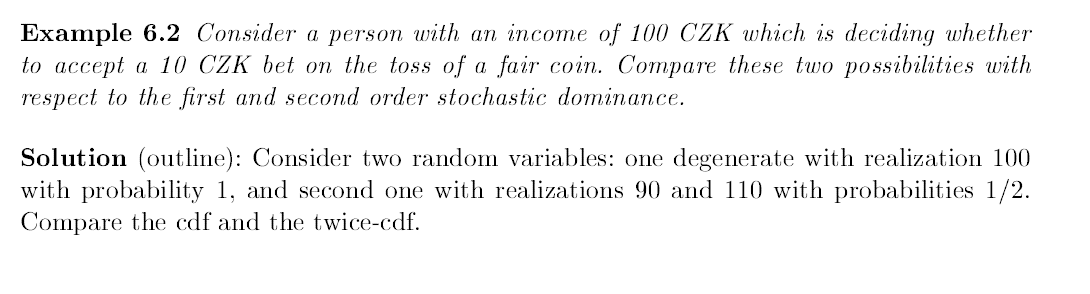

CDF tabuľka (porovnanie stávky):


,85,90,95,100,105,110,115
Bez stávky,0.0,0.0,0.0,1.0,1.0,1.0,1.0
Stávka,0.0,0.5,0.5,0.5,0.5,1.0,1.0



F^{(2)} tabuľka (očakávaná strata pod x):


,85,90,95,100,105,110,115
Bez stávky,0.0,0.0,0.0,0.0,5.0,10.0,15.0
Stávka,0.0,0.0,2.5,5.0,7.5,10.0,15.0


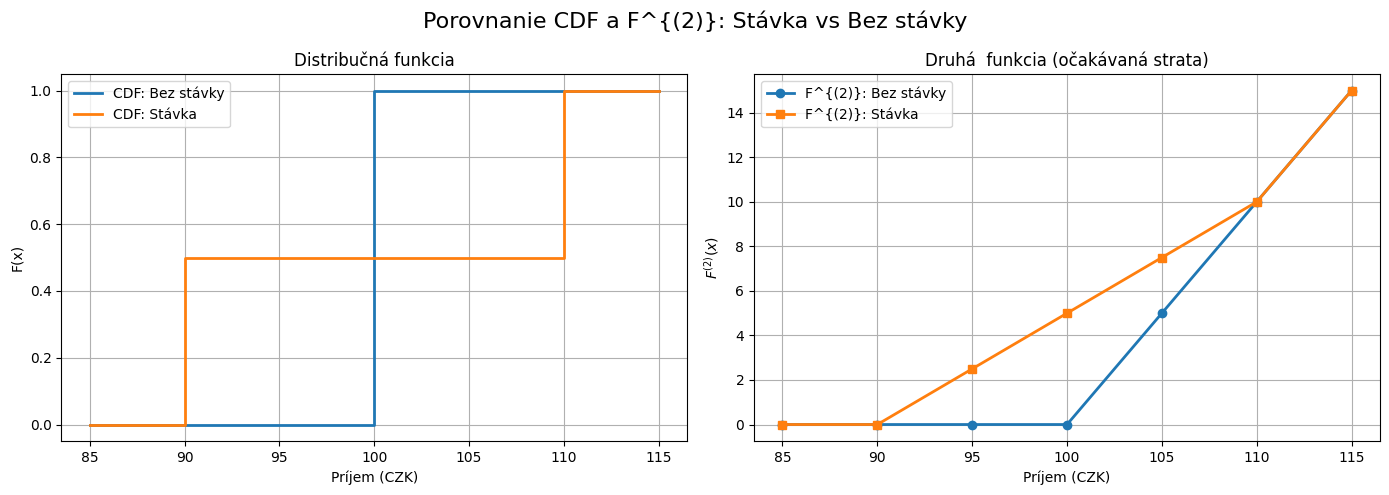

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

# Definovanie dvoch náhodných veličín podľa príkladu 6.2
priklady_vynosy = {
    "Bez stávky": [100],           # Náhodna premenná: 100 s pravd. 1
    "Stávka": [90, 110]            # Férový hod mincou: 90 alebo 110 s pravd. 0.5
}
priklady_pravd = {
    "Bez stávky": [1.0],
    "Stávka": [0.5, 0.5]
}

# Hodnoty x, kde vyhodnocujeme
x_hodnoty = list(range(85, 116, 5))

# Výpočet CDF: P(R ≤ x)
def vypocitaj_cdf(x_vals, data, probs):
    return [sum(p for val, p in zip(data, probs) if val <= x) for x in x_vals]

# Výpočet F^{(2)}(x) = E[(x - R)^+]
def vypocitaj_f2(x_vals, data, probs):
    return [sum((x - val if x > val else 0) * p for val, p in zip(data, probs)) for x in x_vals]

# Tabuľky CDF a SSD pre obidve alternatívy
def vytvor_tabulky(data_dict, prob_dict, x_vals):
    cdf_riadky, f2_riadky = {}, {}
    for nazov, data in data_dict.items():
        pravd = prob_dict[nazov]
        cdf_riadky[nazov] = vypocitaj_cdf(x_vals, data, pravd)
        f2_riadky[nazov] = vypocitaj_f2(x_vals, data, pravd)
    cdf_df = pd.DataFrame(cdf_riadky, index=x_vals).T
    f2_df = pd.DataFrame(f2_riadky, index=x_vals).T
    return cdf_df, f2_df

# Výpočet tabuliek
cdf_tabulka, f2_tabulka = vytvor_tabulky(priklady_vynosy, priklady_pravd, x_hodnoty)

# Zobrazenie tabuliek
print("CDF tabuľka (porovnanie stávky):")
display(cdf_tabulka)

print("\nF^{(2)} tabuľka (očakávaná strata pod x):")
display(f2_tabulka)

# Vykreslenie grafov
fig, osy = plt.subplots(1, 2, figsize=(14, 5))

# Graf CDF
osy[0].step(x_hodnoty, cdf_tabulka.loc["Bez stávky"], where='post', label="CDF: Bez stávky", linewidth=2)
osy[0].step(x_hodnoty, cdf_tabulka.loc["Stávka"], where='post', label="CDF: Stávka", linewidth=2)
osy[0].set_title("Distribučná funkcia")
osy[0].set_xlabel("Príjem (CZK)")
osy[0].set_ylabel("F(x)")
osy[0].grid(True)
osy[0].legend()

# Graf F^{(2)}
osy[1].plot(x_hodnoty, f2_tabulka.loc["Bez stávky"], marker='o', label="F^{(2)}: Bez stávky", linewidth=2)
osy[1].plot(x_hodnoty, f2_tabulka.loc["Stávka"], marker='s', label="F^{(2)}: Stávka", linewidth=2)
osy[1].set_title("Druhá  funkcia (očakávaná strata)")
osy[1].set_xlabel("Príjem (CZK)")
osy[1].set_ylabel(r"$F^{(2)}(x)$")
osy[1].grid(True)
osy[1].legend()

plt.suptitle("Porovnanie CDF a F^{(2)}: Stávka vs Bez stávky", fontsize=16)
plt.tight_layout()
plt.show()
